<a href="https://colab.research.google.com/github/Tai-lPereira/Estudos_de_Softwere/blob/main/Imers%C3%A3oPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Análise de Dados com Pandas

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")


In [9]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [11]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [12]:
df.shape

(133349, 11)

In [13]:
linhas, colunas = df.shape[0], df.shape[1]
print('Linhas:', linhas)
print('Colunas:', colunas)

Linhas: 133349
Colunas: 11


In [14]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [15]:
# Translate column names to Brazilian Portuguese
renomear_colunas = {
    'work_year': 'ano_trabalho',
    'experience_level': 'senioridade',
    'employment_type': 'tipo_emprego',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'localizacao',
    'company_size': 'tamanho'
}
df.rename(columns=renomear_colunas, inplace=True)
df.head()

,ano_trabalho,senioridade,tipo_emprego,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [16]:
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [17]:
df['tipo_emprego'].value_counts()

,count
tipo_emprego,
FT,132563
CT,394
PT,376
FL,16


In [18]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [19]:
df['tamanho'].value_counts()

,count
tamanho,
M,129561
L,3574
S,214


In [21]:
# Translate categories in 'nivel_experiencia' column
senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

df["senioridade"] = df["senioridade"].replace(senioridade)

# Display the updated value counts to verify the translation
display(df['senioridade'].value_counts())

,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [22]:
# Translate categories in 'contrato' column
tipo_emprego = {
    'FT': 'Integral',
    'CT': 'Contrato',
    'PT': 'Parcial',
    'FL': 'Freelancer'
}

df['tipo_emprego'] = df['tipo_emprego'].replace(tipo_emprego)

# Display the updated value counts to verify the translation
display(df['tipo_emprego'].value_counts())

,count
tipo_emprego,
Integral,132563
Contrato,394
Parcial,376
Freelancer,16


In [24]:
# Translate categories in 'tamanho' column
tamanho = {
    'M': 'Médio',
    'L': 'Grande',
    'S': 'Pequeno'
}

df['tamanho'] = df['tamanho'].replace(tamanho)

# Display the updated value counts to verify the translation
display(df['tamanho'].value_counts())

,count
tamanho,
Médio,129561
Grande,3574
Pequeno,214


In [25]:
# Translate categories in 'remoto' column
remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

df['remoto'] = df['remoto'].replace(remoto)

# Display the updated value counts to verify the translation
display(df['remoto'].value_counts())

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [26]:
df.head()

,ano_trabalho,senioridade,tipo_emprego,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [27]:
df.describe(include='object')

,senioridade,tipo_emprego,cargo,moeda,residencia,remoto,localizacao,tamanho
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Integral,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [28]:
df.describe()

,ano_trabalho,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# Aula 2 - Preparação e limpeza dos Dados

In [29]:
df.isnull()

,ano_trabalho,senioridade,tipo_emprego,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [30]:
df.head()

,ano_trabalho,senioridade,tipo_emprego,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [31]:
df.isnull().sum()

,0
ano_trabalho,10
senioridade,0
tipo_emprego,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
localizacao,0


In [33]:
df['ano_trabalho'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [34]:
df[df.isnull().any(axis=1)]

,ano_trabalho,senioridade,tipo_emprego,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho
5588,NaN,Senior,Integral,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,Pleno,Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,Junior,Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,Senior,Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,Senior,Integral,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,Senior,Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,Senior,Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,Junior,Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [35]:
import numpy as np

# Criação de um dataframe de teste para usar de exemplo
df_salarios = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})

# calcula a média salarial e substitui os nulos pela média e arrededonda os valores
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

'''Calcula mediana e substitui os nulos pela mediana
'''

df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [36]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

df_temperaturas["preenchido_ffill"] = df_temperaturas["Temperatura"].ffill()
df_temperaturas

,Dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [37]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

df_temperaturas["preenchido_bfill"] = df_temperaturas["Temperatura"].bfill()
df_temperaturas

,Dia,Temperatura,preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [38]:
df_cidades = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
    'cidade': ["São Paulo", np.nan, "Curitiba", np.nan, "Belém"]
})

df_cidades['cidade_preenchida'] = df_cidades["cidade"].fillna("Não informado")
display(df_cidades)

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belém,Belém


In [39]:
df_limpo = df.dropna()

In [40]:
df_limpo.isnull().sum()

,0
ano_trabalho,0
senioridade,0
tipo_emprego,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
localizacao,0


In [41]:
df_limpo.head()

,ano_trabalho,senioridade,tipo_emprego,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [42]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ano_trabalho  133339 non-null  float64
 1   senioridade   133339 non-null  object 
 2   tipo_emprego  133339 non-null  object 
 3   cargo         133339 non-null  object 
 4   salario       133339 non-null  int64  
 5   moeda         133339 non-null  object 
 6   usd           133339 non-null  int64  
 7   residencia    133339 non-null  object 
 8   remoto        133339 non-null  object 
 9   localizacao   133339 non-null  object 
 10  tamanho       133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [44]:
df_limpo = df_limpo.assign(ano = df_limpo['ano_trabalho'].astype('int64'))

# Aula 3 - Visualização de Dados

In [45]:
df_limpo.head()

,ano_trabalho,senioridade,tipo_emprego,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho,ano
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio,2025
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio,2025
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio,2025
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio,2025
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio,2025


<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

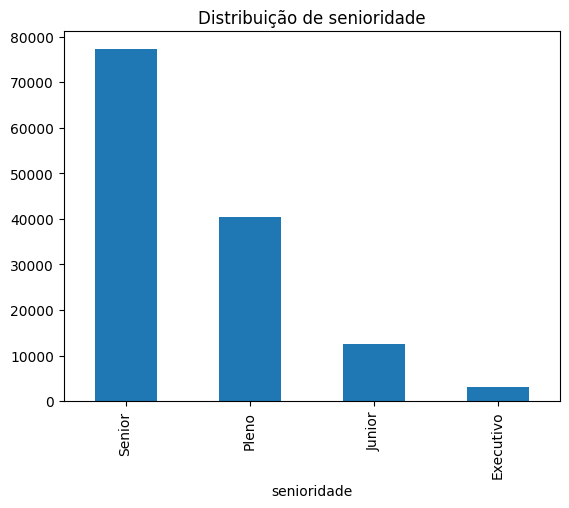

In [46]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title="Distribuição de senioridade")

In [47]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

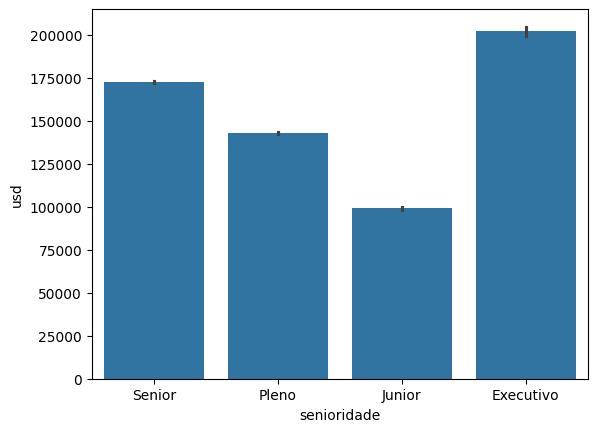

In [48]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [49]:
import matplotlib.pyplot as plt

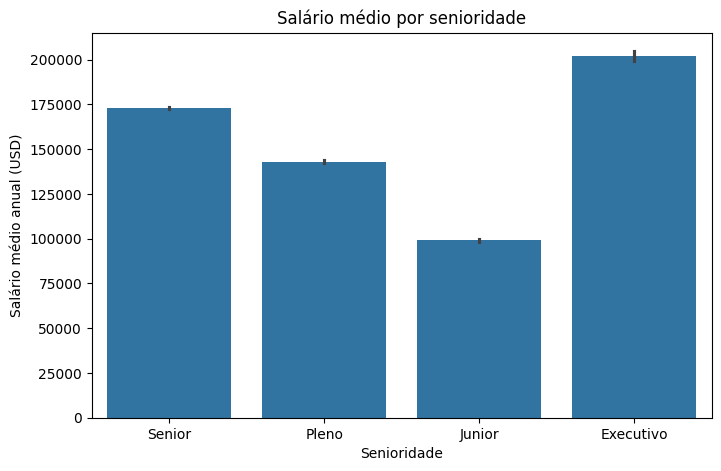

In [50]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

In [51]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [52]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index

In [53]:
ordem

Index(['Executivo', 'Senior', 'Pleno', 'Junior'], dtype='object', name='senioridade')

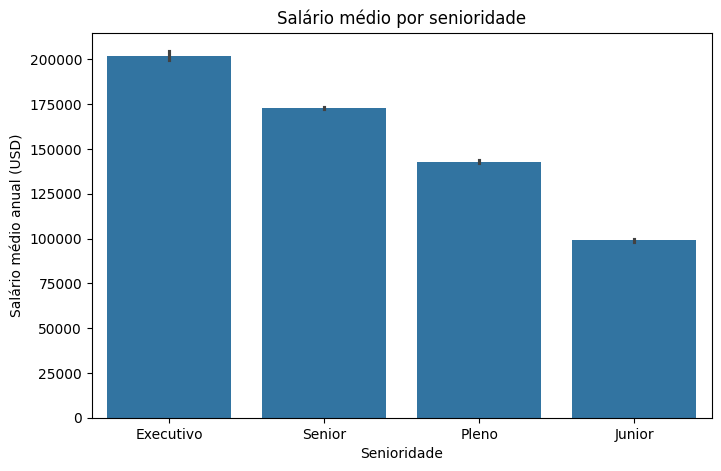

In [54]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

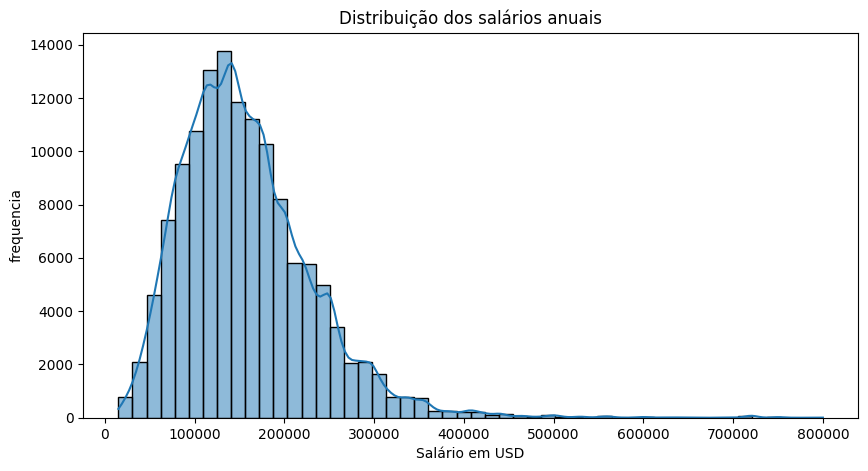

In [55]:
plt.figure(figsize=(10,5))
sns.histplot(df_limpo['usd'], bins = 50, kde=True)
plt.title("Distribuição dos salários anuais")
plt.xlabel("Salário em USD")
plt.ylabel("frequencia")
plt.show()

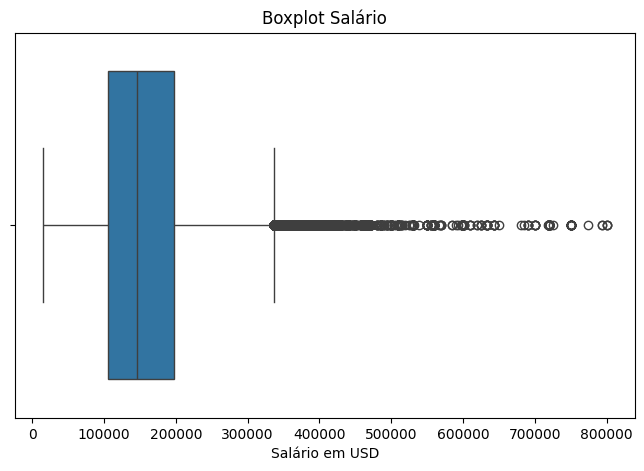

In [56]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['usd'])
plt.title("Boxplot Salário")
plt.xlabel("Salário em USD")
plt.show()

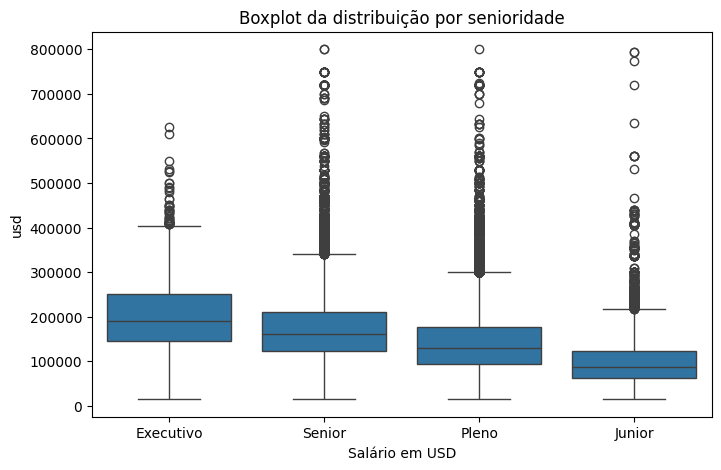

In [62]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem)
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()

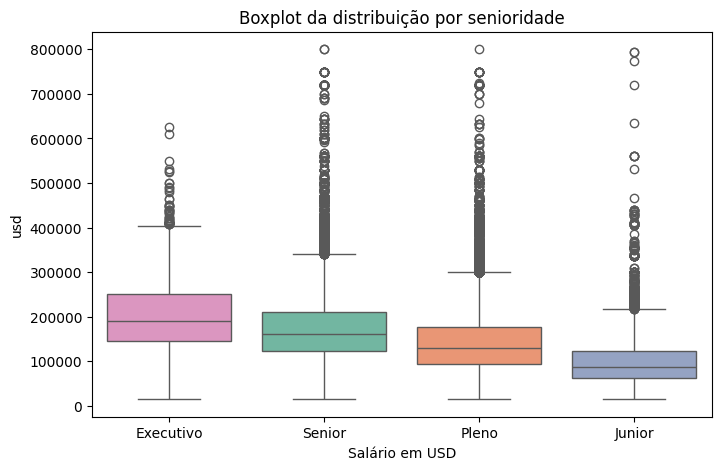

In [64]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem, palette='Set2', hue='senioridade')
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()

In [65]:
import plotly.express as px

In [66]:
# prompt: Crie um gráfico de média salarial por senioridade em barras usando o plotly

senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x='senioridade',
             y='usd',
             title='Média Salarial por Senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial Anual (USD)'})

fig.show()

In [67]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho'

          )

fig.show()

In [68]:
emoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )

fig.show()


In [69]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )
fig.update_traces(textinfo='percent+label')
fig.show()

In [70]:
df.head()

,ano_trabalho,senioridade,tipo_emprego,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [71]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 73.5 MB/s eta 0:00:00


In [72]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()


In [73]:
df_limpo.head()

,ano_trabalho,senioridade,tipo_emprego,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho,ano,residencia_iso3
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio,2025,USA
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio,2025,USA
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio,2025,AUS
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio,2025,AUS
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio,2025,USA


In [74]:
df_limpo.to_csv('dados-imersao-final.csv', index=False)

Aula 4